## Fixed horizon vs Always valid p-value behaviour

In [9]:
# First we define the function that calculates lambda
# given n, the means at n of A and B, and tau_squared 
lambda <- function(n, mu_a_n, mu_b_n, tau_sq){
  v_n <- (mu_a_n*(1-mu_a_n) + mu_b_n*(1-mu_b_n))
  nts <- n*tau_sq
  if(v_n == 0){
    return(1.0)
  }
  else {
    return(
      sqrt((v_n)/(v_n+nts))*
        exp(
          ((n*nts)*(mu_a_n-mu_b_n)^2)/
            ((2.0*v_n)*(v_n+nts))
        )
    )
  }
}

# Next we will calculate the always valid p-values at each n
calc_avpvs <- function(n_obs, cr_a_obs, cr_b_obs, tau_sq = 0.1){
  p_n <- rep(1.0,n_obs)

  for (i in 2:n_obs) {
    mu_a_n <- mean(cr_a_obs[1:i])
    mu_b_n <- mean(cr_b_obs[1:i])
    p_n[[i]] <- min(p_n[[i-1]],1/lambda(i,mu_a_n, mu_b_n, tau_sq))
  }
  
  p_n
}

### Effect between groups

Warning message in prop.test(c(sum(conversions_a[1:x]), sum(conversions_b[1:x])), :
“Chi-squared approximation may be incorrect”
Warning message in prop.test(c(sum(conversions_a[1:x]), sum(conversions_b[1:x])), :
“Chi-squared approximation may be incorrect”
Warning message in prop.test(c(sum(conversions_a[1:x]), sum(conversions_b[1:x])), :
“Chi-squared approximation may be incorrect”
Warning message in prop.test(c(sum(conversions_a[1:x]), sum(conversions_b[1:x])), :
“Chi-squared approximation may be incorrect”


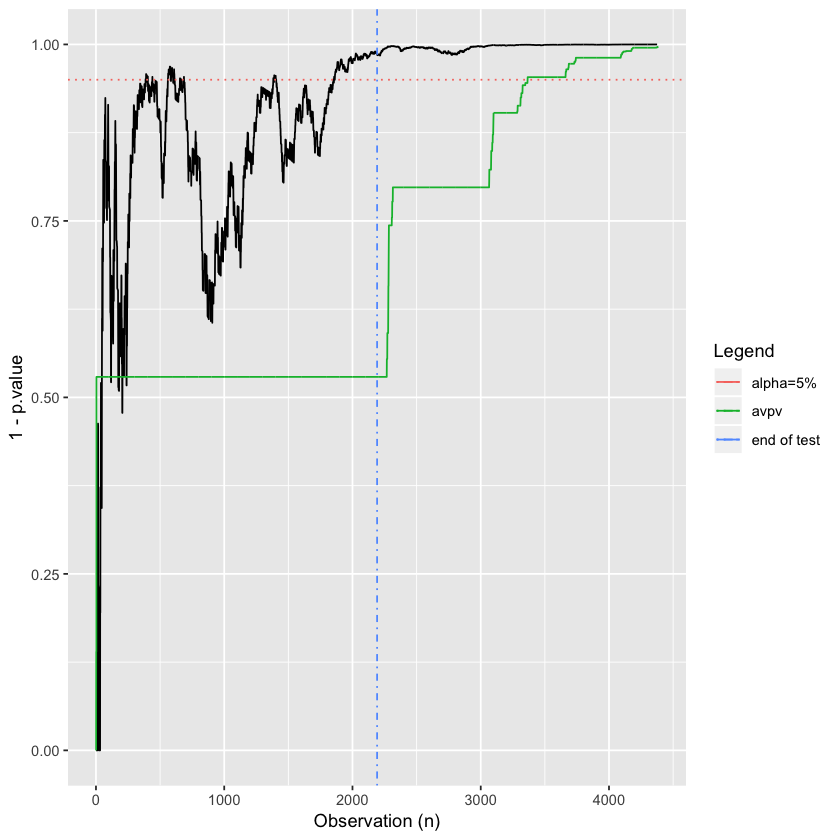

In [41]:
library(pwr)
library(ggplot2)
# set.seed(5)

mde <- 0.15  # minimum detectable effect
cr_a <- 0.25 # the expected conversion rate for group A
alpha <- 0.05 # the false positive rate
power <- 0.80 # 1-false negative rate

ptpt <- pwr.2p.test(h = ES.h(p1 = cr_a, p2 = (1+mde)*cr_a), 
                    sig.level = alpha, 
                    power = power
)
n_obs <- ceiling(ptpt$n)

# make our "true" effect 1.5x larger than the mde
# this should yield a conclusive test result
effect <- 1*mde
cr_b <- (1+effect)*cr_a
observations <- 2*n_obs

# two streams of {0,1} conversions
conversions_a <- rbinom(observations, 1, cr_a)
conversions_b <- rbinom(observations, 1, cr_b)

# now we'll calculate the always-valid p-values
avpvs <- calc_avpvs(observations, conversions_a, conversions_b)


# And we'll calculate "regular" p-values as well
tt <- sapply(10:observations, function(x){
  prop.test(c(sum(conversions_a[1:x]),sum(conversions_b[1:x])), c(x,x))$p.value
})

tt <- data.frame(p.value = unlist(tt))

# for plots
conf_95 <- data.frame( x = c(-Inf, Inf), y = 0.95 )
obs_limit_line <- data.frame( x = n_obs, y = c(-Inf, Inf) )

# plot the evolution of p-values and always-valid p-values
ggplot(tt, aes(x=seq_along(p.value), y=1-p.value)) + 
  geom_line() + 
  geom_line(aes(x, y, color="alpha=5%"), linetype=3, conf_95) + 
  geom_line(aes(x, y, color="end of test"), linetype=4, obs_limit_line) +
  geom_line(data=data.frame(x=seq(1:observations),y=1-avpvs), aes(x=x,y=y, color="avpv")) +
  xlab("Observation (n)") +
  scale_color_discrete(name = "Legend") +
  ylim(c(0,1))


# options(repr.plot.width=200, repr.plot.height=100)

### No effect between groups

Warning message in prop.test(c(sum(conversions_a[1:x]), sum(conversions_b[1:x])), :
“Chi-squared approximation may be incorrect”
Warning message in prop.test(c(sum(conversions_a[1:x]), sum(conversions_b[1:x])), :
“Chi-squared approximation may be incorrect”
Warning message in prop.test(c(sum(conversions_a[1:x]), sum(conversions_b[1:x])), :
“Chi-squared approximation may be incorrect”
Warning message in prop.test(c(sum(conversions_a[1:x]), sum(conversions_b[1:x])), :
“Chi-squared approximation may be incorrect”
Warning message in prop.test(c(sum(conversions_a[1:x]), sum(conversions_b[1:x])), :
“Chi-squared approximation may be incorrect”
Warning message in prop.test(c(sum(conversions_a[1:x]), sum(conversions_b[1:x])), :
“Chi-squared approximation may be incorrect”
Warning message in prop.test(c(sum(conversions_a[1:x]), sum(conversions_b[1:x])), :
“Chi-squared approximation may be incorrect”
Warning message in prop.test(c(sum(conversions_a[1:x]), sum(conversions_b[1:x])), :
“Chi-squared 

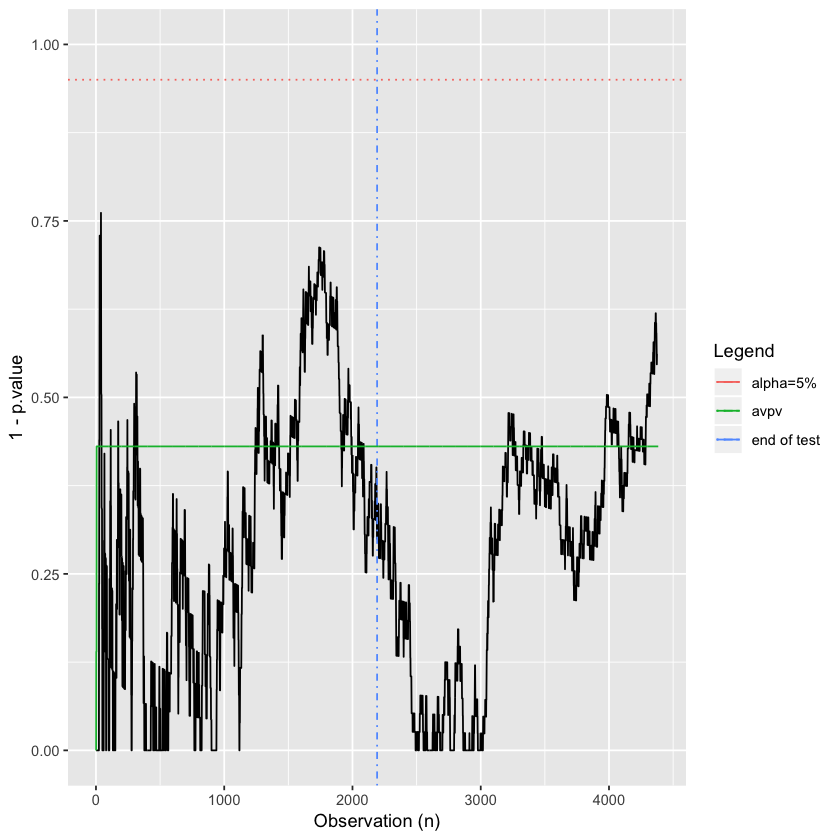

In [59]:
effect <- 0
cr_b <- (1+effect)*cr_a
observations <- 2*n_obs

# two streams of {0,1} conversions
conversions_a <- rbinom(observations, 1, cr_a)
conversions_b <- rbinom(observations, 1, cr_b)

# now we'll calculate the always-valid p-values
avpvs <- calc_avpvs(observations, conversions_a, conversions_b)

# And we'll calculate "regular" p-values as well
tt <- sapply(10:observations, function(x){
  prop.test(c(sum(conversions_a[1:x]),sum(conversions_b[1:x])), c(x,x))$p.value
})
tt <- data.frame(p.value = unlist(tt))

# for plots
conf_95 <- data.frame( x = c(-Inf, Inf), y = 0.95 )
obs_limit_line <- data.frame( x = n_obs, y = c(-Inf, Inf) )

# plot the evolution of p-values and always-valid p-values
ggplot(tt, aes(x=seq_along(p.value), y=1-p.value)) + 
  geom_line() + 
  geom_line(aes(x, y, color="alpha=5%"), linetype=3, conf_95) + 
  geom_line(aes(x, y, color="end of test"), linetype=4, obs_limit_line) +
  geom_line(data=data.frame(x=seq(1:observations),y=1-avpvs), aes(x=x,y=y, color="avpv")) +
  xlab("Observation (n)") +
  scale_color_discrete(name = "Legend") +
  ylim(c(0,1))